# 05 - lab 15 - Drgania masy zawieszonej na sprężynie


In [13]:
import numpy as np
from IPython.display import display, Math

In [14]:
m = np.array([10, 20, 30, 40, 50, 60])
x1 = np.array([21.0, 28.2, 35.4, 42.6, 50.0, 57.1])
x2 = np.array([21.0, 28.2, 35.5, 42.8, 50.0, 57.1])

x1 = x1 / 100
x2 = x2 / 100

m = m / 1000
print(m)

x_0 = 13.6 / 100

[0.01 0.02 0.03 0.04 0.05 0.06]


In [15]:
D_x1 = x1 - x_0
D_x2 = x2 - x_0

print(D_x1)
print(D_x2)

D_x_avg = (D_x1 + D_x2) / 2
print(D_x_avg)

F = m * 9.81
print(F)

[0.074 0.146 0.218 0.29  0.364 0.435]
[0.074 0.146 0.219 0.292 0.364 0.435]
[0.074  0.146  0.2185 0.291  0.364  0.435 ]
[0.0981 0.1962 0.2943 0.3924 0.4905 0.5886]


$$
F = k \cdot x
$$


In [23]:
from scipy import stats

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(F, D_x_avg)

# Calculate spring constant k (in N/m)
k = slope  # Convert from N/cm to N/m

print(f"Spring constant k = {k:.4f} N/m")
print(f"Intercept = {intercept:.5f} m")
print(f"R-squared value = {r_value**2:.4f}")

Spring constant k = 0.7373 N/m
Intercept = 0.00160 m
R-squared value = 1.0000


## Niepewności


### Niepewności współczynników regresji liniowej


In [20]:
# Obliczanie niepewności dla współczynników
n = len(F)
y_pred = slope * F + intercept
s_y = np.sqrt(np.sum((D_x_avg - y_pred) ** 2) / (n - 2))

# Obliczanie niepewności standardowych dla k i b
u_k = s_y * np.sqrt(n / (n * np.sum(F**2) - np.sum(F) ** 2))
u_b = s_y * np.sqrt(np.sum(F**2) / (n * np.sum(F**2) - np.sum(F) ** 2))

display(Math(r"u_k = " + f"{u_k:.6f}"))
display(Math(r"u_b = " + f"{u_b:.6f}"))

print(f"u_k = {u_k:.6f}")
print(f"u_b = {u_b:.6f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

u_k = 0.001210
u_b = 0.000462


### Niepewność wydłużenia

$$
\Delta_d(x) = 0.001
$$

$$
u_B(x) = \frac{\Delta_d x}{\sqrt{3}}
$$


In [34]:
Delta_x = 0.001
u_x = Delta_x / np.sqrt(3)
print(u_x)

0.0005773502691896258


In [35]:
u_Delta_x = np.sqrt(2) * u_x
print(u_Delta_x)

0.0008164965809277262


In [37]:
u_Delta_x_avg = u_Delta_x / np.sqrt(2)
print(u_Delta_x_avg)

0.0005773502691896258


## niepewność pomiaru czasu


In [46]:
Delta_t = 0.2
u_B_t = Delta_t / np.sqrt(3)
print(f"u_B_t = {u_B_t}")

u_B_t = 0.11547005383792516


### Niepewność okresu

$$
u_c(T) = \frac{u_B(t)}{N}
$$


In [48]:
N = 20
u_c_T = u_B_t / N
print(f"u_c_T = {u_c_T}")

u_c_T = 0.005773502691896258


## Wykres


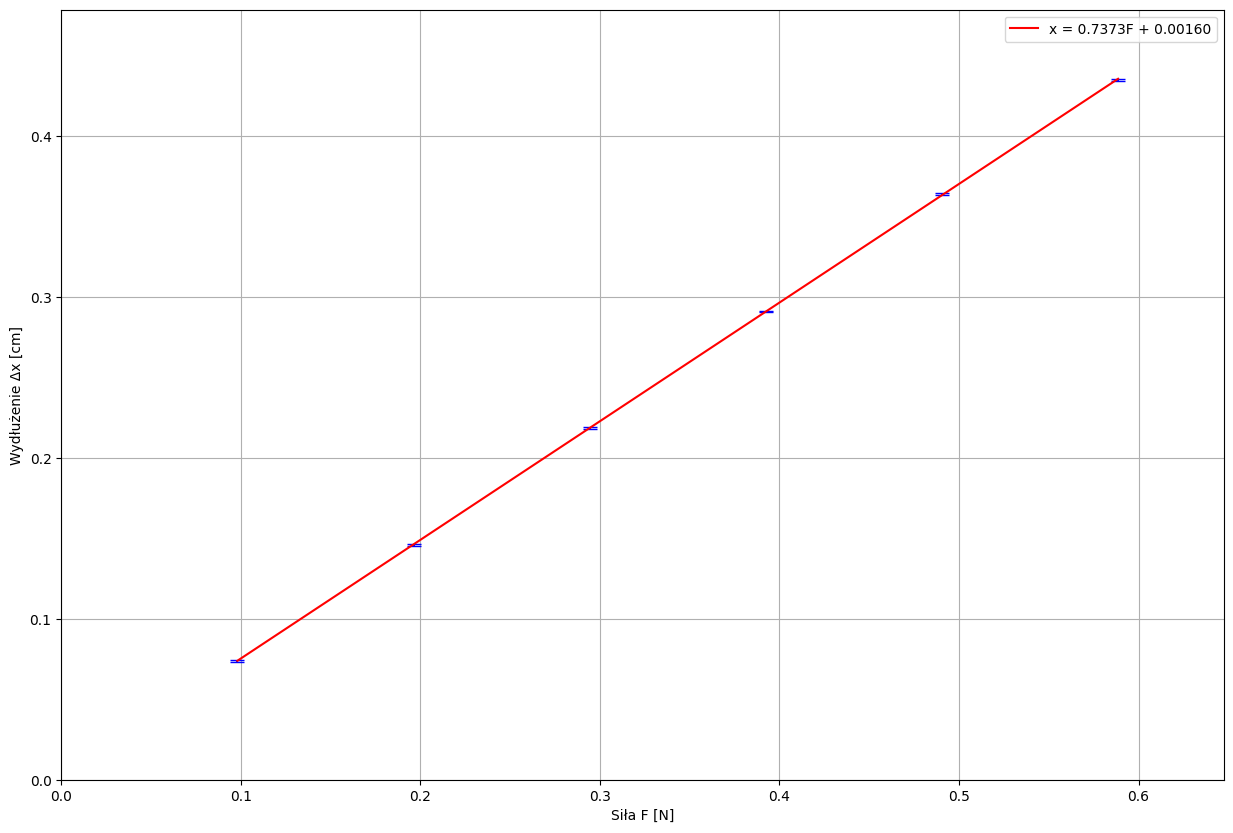

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
plt.errorbar(
    F, D_x_avg, yerr=u_Delta_x_avg, fmt="none", color="blue", capsize=5
)  # Add error bars

# Calculate linear regression
slope, intercept = np.polyfit(F, D_x_avg, 1)
regression_line = slope * F + intercept

# Plot regression line
plt.plot(F, regression_line, "r-", label=f"x = {slope:.4f}F + {intercept:.5f}")

plt.xlabel("Siła F [N]")
plt.ylabel("Wydłużenie Δx [cm]")
plt.grid(True)
plt.xlim(0, max(F) * 1.1)  # Start x-axis from 0 with 10% margin
plt.ylim(0, max(D_x_avg) * 1.1)  # Start y-axis from 0 with 10% margin
plt.legend()
plt.show()